<a href="https://colab.research.google.com/github/quoctrungsz27/week9_AI/blob/main/week9_mytrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bài Toán 3 kênh
#keras/datasets/afar10/load_data()

from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)= tf.keras.datasets.cifar10.load_data()
print(x_train.shape) #Hiển thị số giá trị
print(y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)


 [3]


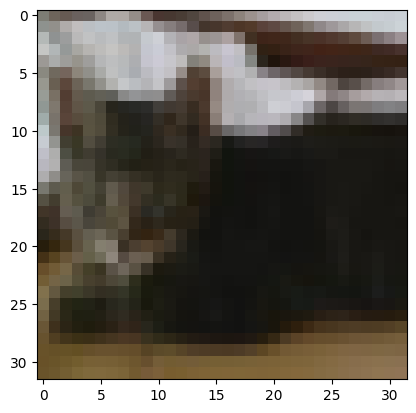

In [ ]:
#Hiển thị 1 hình bất kỳ

hinh = x_train[9]
plt.imshow(hinh, cmap= plt.cm.binary)
plt.show
print('Con bao', y_train[9])

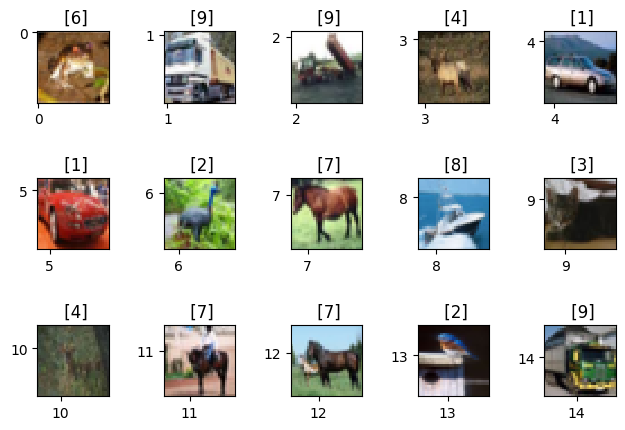

In [ ]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation = 'none')
  plt.title(' {}'.format(y_train[i]))
  plt.xticks([i])
  plt.yticks([i])

In [ ]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.serialization import activation

In [ ]:
model = Sequential()
model.add(Dense(10000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(5000,activation='relu'))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))


model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             30730000  
                                                                 
 dense_1 (Dense)             (None, 5000)              50005000  
                                                                 
 dense_2 (Dense)             (None, 3000)              15003000  
                                                                 
 dense_3 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
Total params: 99,244,510
Trainable params: 99,244,510
No

In [ ]:
X = x_test
Y = y_test

In [ ]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
print(x_train.shape)

(50000, 3072)


In [ ]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255
print(x_test.shape)

(10000, 3072)


In [ ]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)

(50000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 1,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Độ chính xác trên tập kiểm tra:',test_acc)
print('Hàm mất mát trên tập kiểm tra:',test_loss)

313/313 [==============================] - 71s 227ms/step - loss: 2.1008 - accuracy: 0.2048
Độ chính xác trên tập kiểm tra: 0.20479999482631683
Hàm mất mát trên tập kiểm tra: 2.10076642036438


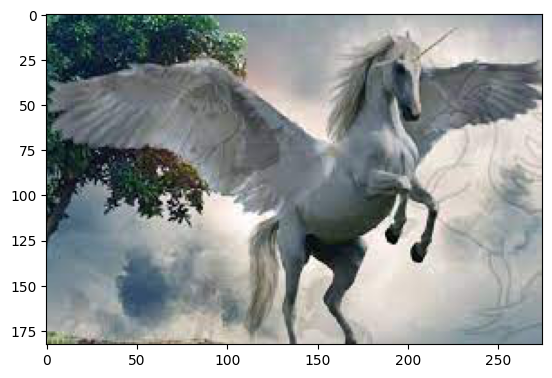

In [ ]:
url = 'horse.jpg'
img = plt.imread(url)
plt.imshow(img)
plt.show()

In [ ]:
model.save('mode3d.h5')

1/1 [==============================] - 0s 156ms/step


array([0])

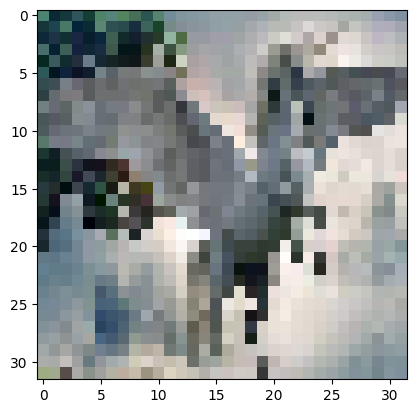

In [ ]:
from keras.utils.image_utils import img_to_array,load_img
img = load_img(url,target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)